In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
graphs = {
    'camelyon': {
        'ID': {
            'Barlow Twins': './data/camelyon/baseline/wandb_export_2024-06-13T14_10_28.140+02_00_ID.csv',
            'MixStyle': './data/camelyon/mixstyle/wandb_export_2024-06-13T16_13_38.227+02_00_ID.csv',
            'DANN': None
        },
        'OOD-Val.': {
            'Barlow Twins': './data/camelyon/baseline/wandb_export_2024-06-13T14_11_05.566+02_00_OOD_VAL.csv',
            'MixStyle': './data/camelyon/mixstyle/wandb_export_2024-06-13T16_13_52.828+02_00_OOD_VAL.csv',
            'DANN': None
        },
        'OOD-Test': {
            'Barlow Twins': './data/camelyon/baseline/wandb_export_2024-06-13T14_11_29.190+02_00_OOD_TST.csv',
            'MixStyle': './data/camelyon/mixstyle/wandb_export_2024-06-13T16_14_08.684+02_00_OOD_TST.csv',
            'DANN': None
        },
    },
    'pacs': {
        'Barlow Twins': './data/pacs/baseline/wandb_export_2024-06-13T13_25_40.892+02_00.csv',
        'MixStyle': './data/pacs/mixstyle/wandb_export_2024-06-13T13_24_34.132+02_00.csv',
        'DANN': None
    }
}

In [3]:
def plot_mean_std(df: pd.DataFrame, c: str, label: str, ax=None) -> None:
    data = df.to_numpy()
    x = data[:,0]
    y_all = data[:,1::3]
    y_mean = y_all.mean(axis=1)
    y_std = y_all.std(axis=1)

    if ax:
        ax.plot(x, y_mean, c, label=label)
        ax.fill_between(x, y_mean + y_std, y_mean - y_std, facecolor=c, alpha=0.5)
    else:    
        plt.plot(x, y_mean, c, label=label)
        plt.fill_between(x, y_mean + y_std, y_mean - y_std, facecolor=c, alpha=0.5)

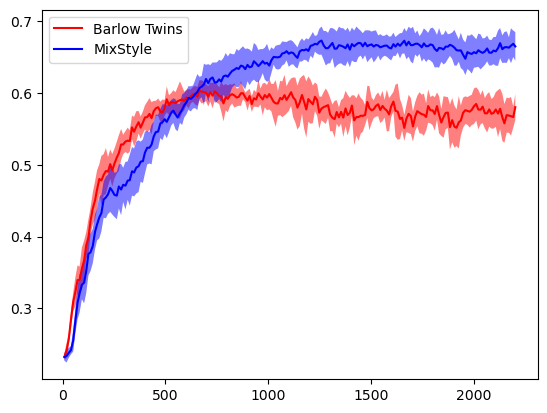

In [4]:
for (k, v), c in zip(graphs['pacs'].items(), ['r', 'b', 'g']):
    if not v:
        break
    df = pd.read_csv(v)
    plot_mean_std(df, c, k)
plt.legend(loc='best')

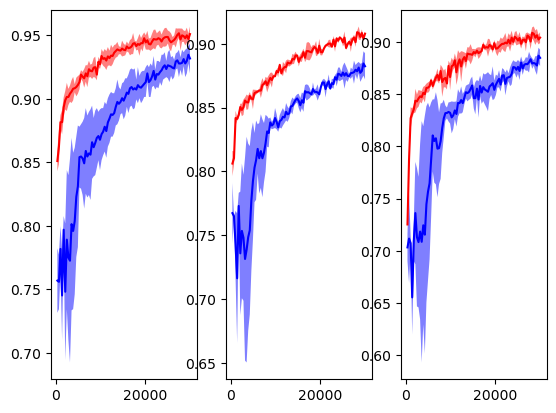

In [5]:
n_subplots = len(graphs['camelyon'].keys())
fig, axes = plt.subplots(1, n_subplots)

for (dom, models), ax in zip(graphs['camelyon'].items(), axes):
    for (name, graph), c in zip(models.items(), ['r', 'b', 'g']):
        if not graph:
            break
        df = pd.read_csv(graph)
        plot_mean_std(df, c, k, ax=ax)